In [9]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [11]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [13]:
X_train.shape

(60000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

In [19]:
y_train.shape

(60000,)

In [25]:
y_train[0]

5

In [29]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [33]:
X_train = X_train/255
X_test = X_test/255

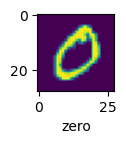

In [43]:
numbers = {0:'zero', 1:'one', 2:'two', 3:'three', 4:'four', 5:'five', 6:'six', 7:'seven', 8:'eight', 9:'nine'}
def plot_sample(X, y, index):
    plt.figure(figsize= (5,1))
    plt.imshow(X[index])
    plt.xlabel(numbers[y[index]])

plot_sample(X_train, y_train, 1)

In [47]:
ann = models.Sequential([
    layers.Flatten(input_shape = (28,28,)),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5


D:\Anaconda__\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9084 - loss: 0.3067
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9763 - loss: 0.0775
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9849 - loss: 0.0462
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9903 - loss: 0.0302
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9933 - loss: 0.0210


In [51]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9700 - loss: 0.1066


[0.08758316934108734, 0.9747999906539917]

In [55]:
y_preds = ann.predict(X_test)
y_preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[4.92836216e-06, 4.71686217e-04, 1.98484678e-03, ...,
        9.99958396e-01, 1.23413242e-02, 2.20877528e-01],
       [2.97852256e-03, 6.82353139e-01, 9.99999940e-01, ...,
        1.11518688e-08, 9.24716442e-05, 2.09996045e-07],
       [7.59474915e-06, 9.97944832e-01, 1.03586605e-02, ...,
        7.74487182e-02, 4.11752276e-02, 6.41523093e-06],
       ...,
       [6.19794840e-12, 1.98327513e-07, 1.10377663e-08, ...,
        3.27912010e-02, 5.10151032e-03, 6.33097529e-01],
       [2.02151000e-06, 1.32031374e-07, 4.79331129e-06, ...,
        9.26102217e-08, 8.17834020e-01, 8.47220781e-06],
       [1.32726927e-04, 2.09239897e-06, 1.07721975e-02, ...,
        8.73187886e-08, 3.57995523e-05, 4.21083882e-07]], dtype=float32)

In [73]:
y_preds_classes = [np.argmax(element) for element in y_preds]
y_preds_classes[:20]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 4, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

In [77]:
y_test[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

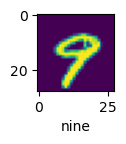

In [79]:
plot_sample(X_test, y_test, 9)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.92      0.99      0.96       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       1.00      0.94      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000



In [95]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters =64, kernel_size =(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9267 - loss: 0.2344
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9885 - loss: 0.0382
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9927 - loss: 0.0230
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9947 - loss: 0.0163
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9969 - loss: 0.0100


In [97]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9884 - loss: 0.0339


[0.028412148356437683, 0.9908000230789185]

In [99]:
y_preds = cnn.predict(X_test)
y_preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.1666086e-10, 6.1879718e-10, 4.9544369e-09, ..., 9.9999952e-01,
        1.5793883e-09, 2.5655424e-07],
       [8.7564569e-09, 1.7931873e-10, 1.0000000e+00, ..., 4.3710272e-16,
        8.9540625e-13, 4.1036336e-15],
       [7.0696217e-08, 9.9967635e-01, 1.5136795e-06, ..., 7.7475161e-06,
        1.6668733e-04, 2.0214215e-07],
       ...,
       [1.5213876e-18, 4.1422278e-12, 3.5678315e-14, ..., 1.9030112e-13,
        1.7425178e-10, 4.7025504e-12],
       [4.1400672e-12, 2.6257794e-13, 2.2270743e-15, ..., 1.2266606e-14,
        2.0103143e-05, 1.1766003e-11],
       [1.3696713e-09, 1.8072652e-10, 2.1875719e-09, ..., 3.1264175e-17,
        1.7920256e-09, 1.4436193e-11]], dtype=float32)

In [101]:
y_classes = [np.argmax(element) for element in y_preds]
y_classes[:20]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

In [103]:
y_test[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

In [105]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

